In [23]:
import io # navigating files
from PIL import Image 
import pytesseract
from wand.image import Image as wi # working with PDFs and images
import cv2
import numpy as np
from wand.color import Color
import fitz
from matplotlib import pyplot as plt
import sddk

In [2]:
print(fitz.__doc__)


PyMuPDF 1.16.17: Python bindings for the MuPDF 1.16.0 library.
Version date: 2020-03-31 08:53:33.
Built for Python 3.6 on darwin (64-bit).



In [12]:
doc = fitz.open("./data/test-cyr.pdf")

In [13]:
doc.pageCount

10

In [14]:
def pix2np(pix):
    im = np.frombuffer(pix.samples, dtype=np.uint8).reshape(pix.h, pix.w, pix.n)
    #im = np.ascontiguousarray(im[..., [2, 1, 0]])  # rgb to bgr
    return im

In [15]:
imgs = []
for page in doc: ### or you can specify: doc(start, end, step):
    pix = page.getPixmap(matrix = fitz.Matrix(2, 2))  # try "csGRAY"
    im = pix2np(pix)
    imgs.append(im)

In [16]:
def rect(img,rect):
    '''return rectangle defined by side ratio'''
    h = img.shape[0]
    w = img.shape[1]
    return img[int(h * rect[0]):int((h * rect[1])), int(w * rect[2]):int((w * rect[3]))]

In [17]:
test_img = doc[2]
test_imgs = [] 
test_imgs.append(pix2np(test_img.getPixmap()))
test_imgs.append(pix2np(test_img.getPixmap(colorspace="csGRAY")))
test_imgs.append(pix2np(test_img.getPixmap(matrix = fitz.Matrix(2, 2))))
test_imgs.append(pix2np(test_img.getPixmap(matrix = fitz.Matrix(2, 2), colorspace="csGRAY")))
test_imgs.append(pix2np(test_img.getPixmap(matrix = fitz.Matrix(3, 3), colorspace="csGRAY")))

test_imgs = [rect(img, [0.17, 0.58, 0.5, 1]) for img in test_imgs]

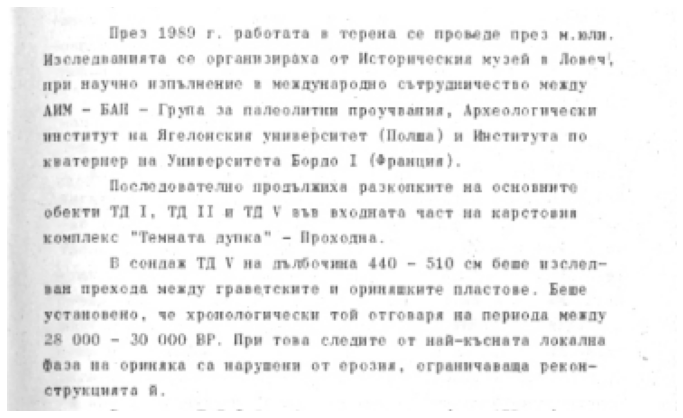

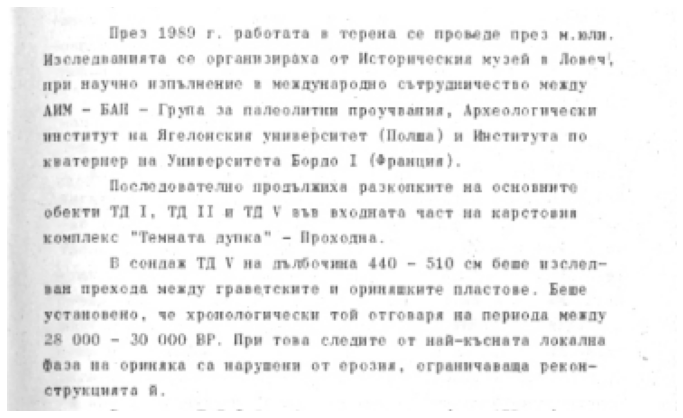

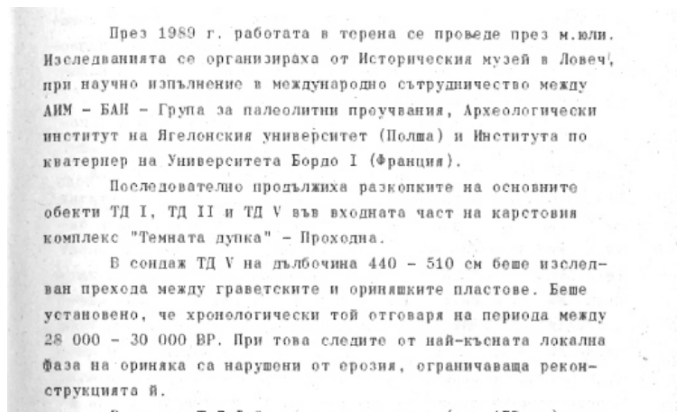

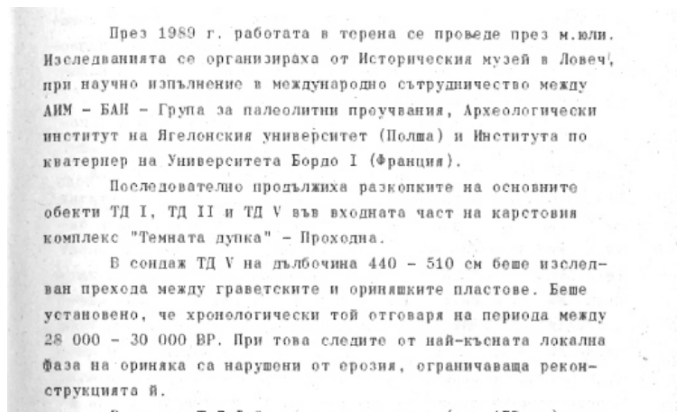

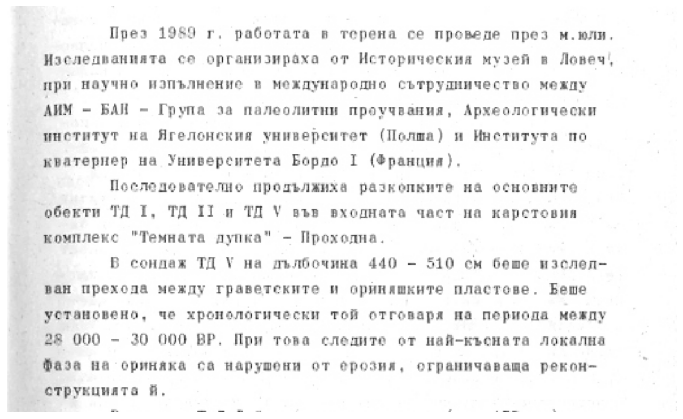

In [18]:
for img in test_imgs:
    fig = plt.figure(figsize=(12,8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

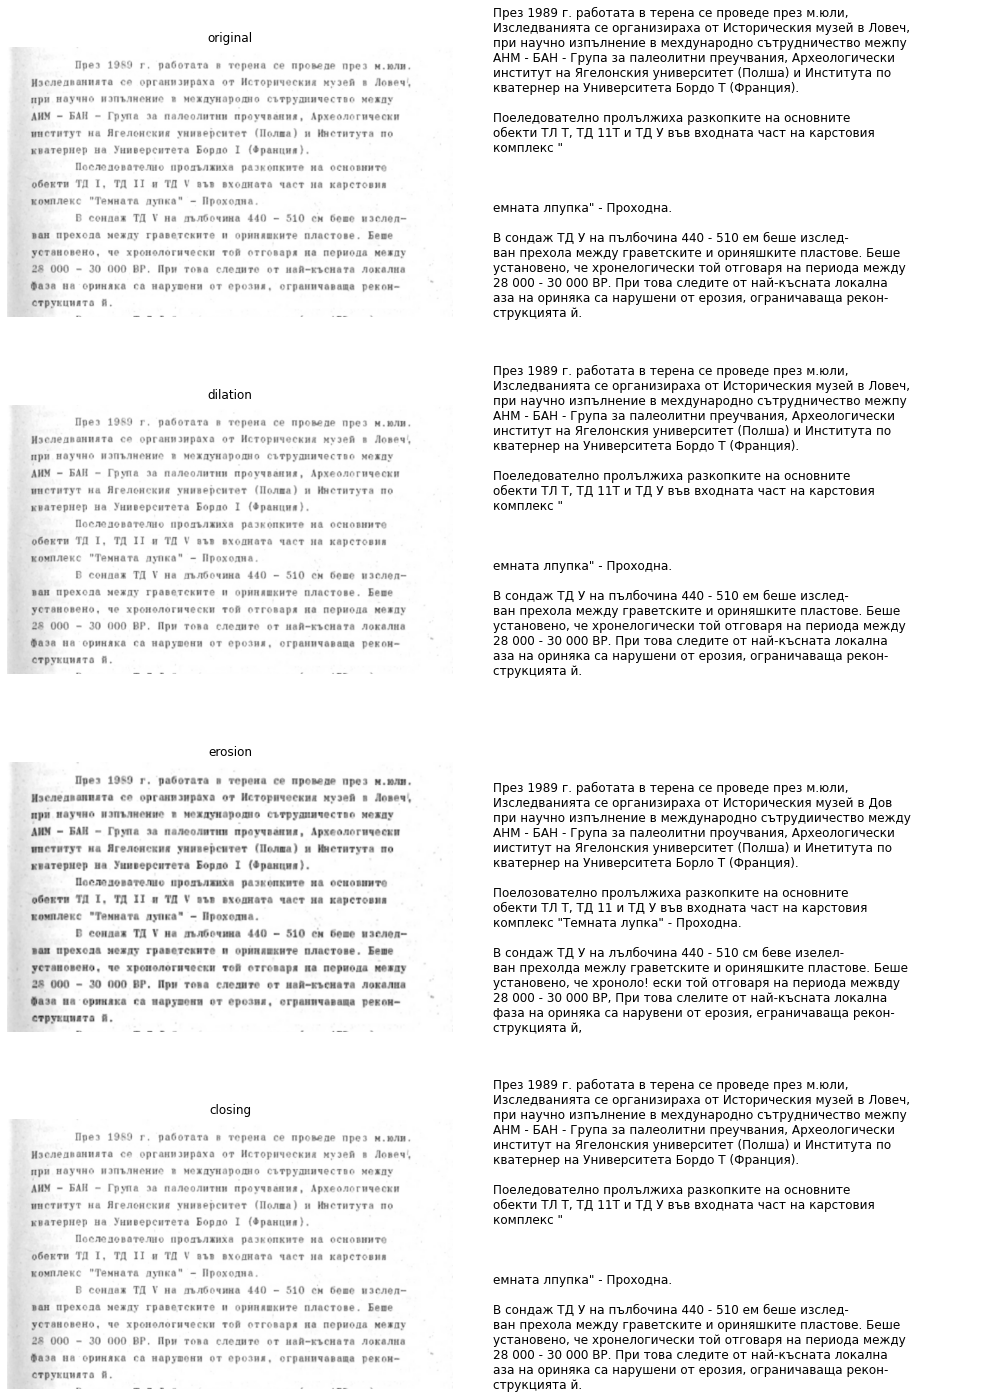

In [20]:
img = test_imgs[3]

imgs_transf = []
# ORIG IMG
imgs_transf.append(img)
# DILATION
kernel = np.ones((1, 1), np.uint8)
img_dil = cv2.dilate(img, kernel, iterations=1)
imgs_transf.append(img_dil)
# EROSION
kernel = np.ones((2, 2), np.uint8)
img_er = cv2.erode(img, kernel, iterations=1)
imgs_transf.append(img_er)
# CLOSING
kernel = np.ones((1, 1), np.uint8)
img_clo = closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
imgs_transf.append(img_clo)

fig, axs = plt.subplots(4, 2, figsize=(15,20), tight_layout=True)

for img, ax_pair, title in zip(imgs_transf, axs, ["original", "dilation", "erosion", "closing"]):
    ax_pair[0].imshow(img)
    ax_pair[0].axis("off")
    ax_pair[0].set_title(title)
    txt = pytesseract.image_to_string(img, lang="bul")
    ax_pair[1].text(0, 0, txt, fontsize=12) 
    ax_pair[1].axis("off")

In [21]:
fig.savefig("./figs/cyr-test-comparison.png")

In [24]:
### to export the test file out of here.
conf = sddk.configure_session_and_url("images/ocr-tools", "648597@au.dk")
sddk.write_file("cyr-test-comparison.png", fig, conf)

sciencedata.dk username (format '123456@au.dk'):  648597@au.dk
sciencedata.dk password:  ········


connection with shared folder established with you as its owner
endpoint variable has been configured to: https://sciencedata.dk/files/images/ocr-tools/
A file with the same name ("cyr-test-comparison.png") already exists in this location.


Press Enter to overwrite it or choose different path and filename:  


Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/images/ocr-tools/cyr-test-comparison.png"
